In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt #graphs
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/homecredit/sample_submission.csv
/kaggle/input/homecredit/feature_definitions.csv
/kaggle/input/homecredit/parquet_files/test/test_deposit_1.parquet
/kaggle/input/homecredit/parquet_files/test/test_applprev_2.parquet
/kaggle/input/homecredit/parquet_files/test/test_static_cb_0.parquet
/kaggle/input/homecredit/parquet_files/test/test_static_0_0.parquet
/kaggle/input/homecredit/parquet_files/test/test_credit_bureau_a_1_3.parquet
/kaggle/input/homecredit/parquet_files/test/test_credit_bureau_a_1_2.parquet
/kaggle/input/homecredit/parquet_files/test/test_tax_registry_b_1.parquet
/kaggle/input/homecredit/parquet_files/test/test_static_0_2.parquet
/kaggle/input/homecredit/parquet_files/test/test_credit_bureau_a_2_3.parquet
/kaggle/input/homecredit/parquet_files/test/test_credit_bureau_a_2_9.parquet
/kaggle/input/homecredit/parquet_files/test/test_debitcard_1.parquet
/kaggle/input/homecredit/parquet_files/test/test_credit_bureau_a_1_1.parquet
/kaggle/input/homecredit/parquet_fil

In [21]:
#!pip install kaggle 
!pip install --upgrade kaggle

In [13]:
 # Specify the directory path
directory_path = '/kaggle/input/homecredit/csv_files/' 
# Specify the subdirectory name
subdirectory_name = 'test'

# List files in the subdirectory
subdirectory_path = os.path.join(directory_path, subdirectory_name)
file_list = os.listdir(subdirectory_path) 

# Create an empty dictionary to store DataFrames
data_dict = {}
# Loop through each file in the subdirectory
for file_name in file_list:
   # Construct the full file path
    file_path = os.path.join(subdirectory_path, file_name)
     # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Store the DataFrame in the dictionary using the file name as the key
data_dict[file_name] = df

 # Display the first few rows of each DataFrame
for file_name, df in data_dict.items():
    print(df.tail(5))



   case_id collater_typofvalofguarant_298M collater_typofvalofguarant_407M  \
5    57543                        a55475b1                        8fd95e4b   
6    57543                        a55475b1                        8fd95e4b   
7    57543                        a55475b1                        9a0c095e   
8    57543                        a55475b1                        9a0c095e   
9    57543                        a55475b1                        9a0c095e   

   collater_valueofguarantee_1124L  collater_valueofguarantee_876L  \
5                              NaN                             0.0   
6                              NaN                             0.0   
7                              NaN                             0.0   
8                              NaN                             0.0   
9                              NaN                             0.0   

  collaterals_typeofguarante_359M collaterals_typeofguarante_669M  num_group1  \
5                        c7a5

In [22]:
# Identify missing values 
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
case_id                             0
collater_typofvalofguarant_298M     0
collater_typofvalofguarant_407M     0
collater_valueofguarantee_1124L     8
collater_valueofguarantee_876L      0
collaterals_typeofguarante_359M     0
collaterals_typeofguarante_669M     0
num_group1                          0
num_group2                          0
pmts_dpd_1073P                      9
pmts_dpd_303P                      10
pmts_month_158T                     8
pmts_month_706T                     0
pmts_overdue_1140A                  9
pmts_overdue_1152A                 10
pmts_year_1139T                     8
pmts_year_507T                      0
subjectroles_name_541M              0
subjectroles_name_838M              0
dtype: int64


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_id                          10 non-null     int64  
 1   collater_typofvalofguarant_298M  10 non-null     object 
 2   collater_typofvalofguarant_407M  10 non-null     object 
 3   collater_valueofguarantee_1124L  2 non-null      float64
 4   collater_valueofguarantee_876L   10 non-null     float64
 5   collaterals_typeofguarante_359M  10 non-null     object 
 6   collaterals_typeofguarante_669M  10 non-null     object 
 7   num_group1                       10 non-null     int64  
 8   num_group2                       10 non-null     int64  
 9   pmts_dpd_1073P                   1 non-null      float64
 10  pmts_dpd_303P                    0 non-null      float64
 11  pmts_month_158T                  2 non-null      float64
 12  pmts_month_706T          

,case_id,collater_valueofguarantee_1124L,collater_valueofguarantee_876L,num_group1,num_group2,pmts_dpd_1073P,pmts_dpd_303P,pmts_month_158T,pmts_month_706T,pmts_overdue_1140A,pmts_overdue_1152A,pmts_year_1139T,pmts_year_507T
count,10.0,2.0,10.0,10.00000,10.0,1.0,0.0,2.0,10.0,1.0,0.0,2.000000,10.000000
mean,57543.0,0.0,0.0,4.50000,0.0,0.0,NaN,2.0,2.0,0.0,NaN,2020.500000,2016.000000
std,0.0,0.0,0.0,3.02765,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.707107,2.309401
min,57543.0,0.0,0.0,0.00000,0.0,0.0,NaN,2.0,2.0,0.0,NaN,2020.000000,2011.000000
25%,57543.0,0.0,0.0,2.25000,0.0,0.0,NaN,2.0,2.0,0.0,NaN,2020.250000,2015.000000
50%,57543.0,0.0,0.0,4.50000,0.0,0.0,NaN,2.0,2.0,0.0,NaN,2020.500000,2016.500000
75%,57543.0,0.0,0.0,6.75000,0.0,0.0,NaN,2.0,2.0,0.0,NaN,2020.750000,2018.000000
max,57543.0,0.0,0.0,9.00000,0.0,0.0,NaN,2.0,2.0,0.0,NaN,2021.000000,2018.000000


In [24]:
df.head()

,case_id,collater_typofvalofguarant_298M,collater_typofvalofguarant_407M,collater_valueofguarantee_1124L,collater_valueofguarantee_876L,collaterals_typeofguarante_359M,collaterals_typeofguarante_669M,num_group1,num_group2,pmts_dpd_1073P,pmts_dpd_303P,pmts_month_158T,pmts_month_706T,pmts_overdue_1140A,pmts_overdue_1152A,pmts_year_1139T,pmts_year_507T,subjectroles_name_541M,subjectroles_name_838M
0,57543,9a0c095e,9a0c095e,0.0,0.0,c7a5ad39,c7a5ad39,0,0,NaN,NaN,2.0,2.0,NaN,NaN,2020.0,2011.0,ab3c25cf,ab3c25cf
1,57543,9a0c095e,8fd95e4b,0.0,0.0,c7a5ad39,c7a5ad39,1,0,0.0,NaN,2.0,2.0,0.0,NaN,2021.0,2015.0,ab3c25cf,ab3c25cf
2,57543,a55475b1,9a0c095e,NaN,0.0,c7a5ad39,a55475b1,2,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2015.0,ab3c25cf,a55475b1
3,57543,a55475b1,9a0c095e,NaN,0.0,c7a5ad39,a55475b1,3,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2014.0,ab3c25cf,a55475b1
4,57543,a55475b1,9a0c095e,NaN,0.0,c7a5ad39,a55475b1,4,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2016.0,ab3c25cf,a55475b1


In [25]:
df_cleaned = df.dropna()

# Check if missing values have been handled
print("Missing values after handling:")
print(df_cleaned.isnull().sum())

Missing values after handling:
case_id                            0
collater_typofvalofguarant_298M    0
collater_typofvalofguarant_407M    0
collater_valueofguarantee_1124L    0
collater_valueofguarantee_876L     0
collaterals_typeofguarante_359M    0
collaterals_typeofguarante_669M    0
num_group1                         0
num_group2                         0
pmts_dpd_1073P                     0
pmts_dpd_303P                      0
pmts_month_158T                    0
pmts_month_706T                    0
pmts_overdue_1140A                 0
pmts_overdue_1152A                 0
pmts_year_1139T                    0
pmts_year_507T                     0
subjectroles_name_541M             0
subjectroles_name_838M             0
dtype: int64


In [26]:
#print(df.describe())
print(df.dtypes)

case_id                              int64
collater_typofvalofguarant_298M     object
collater_typofvalofguarant_407M     object
collater_valueofguarantee_1124L    float64
collater_valueofguarantee_876L     float64
collaterals_typeofguarante_359M     object
collaterals_typeofguarante_669M     object
num_group1                           int64
num_group2                           int64
pmts_dpd_1073P                     float64
pmts_dpd_303P                      float64
pmts_month_158T                    float64
pmts_month_706T                    float64
pmts_overdue_1140A                 float64
pmts_overdue_1152A                 float64
pmts_year_1139T                    float64
pmts_year_507T                     float64
subjectroles_name_541M              object
subjectroles_name_838M              object
dtype: object


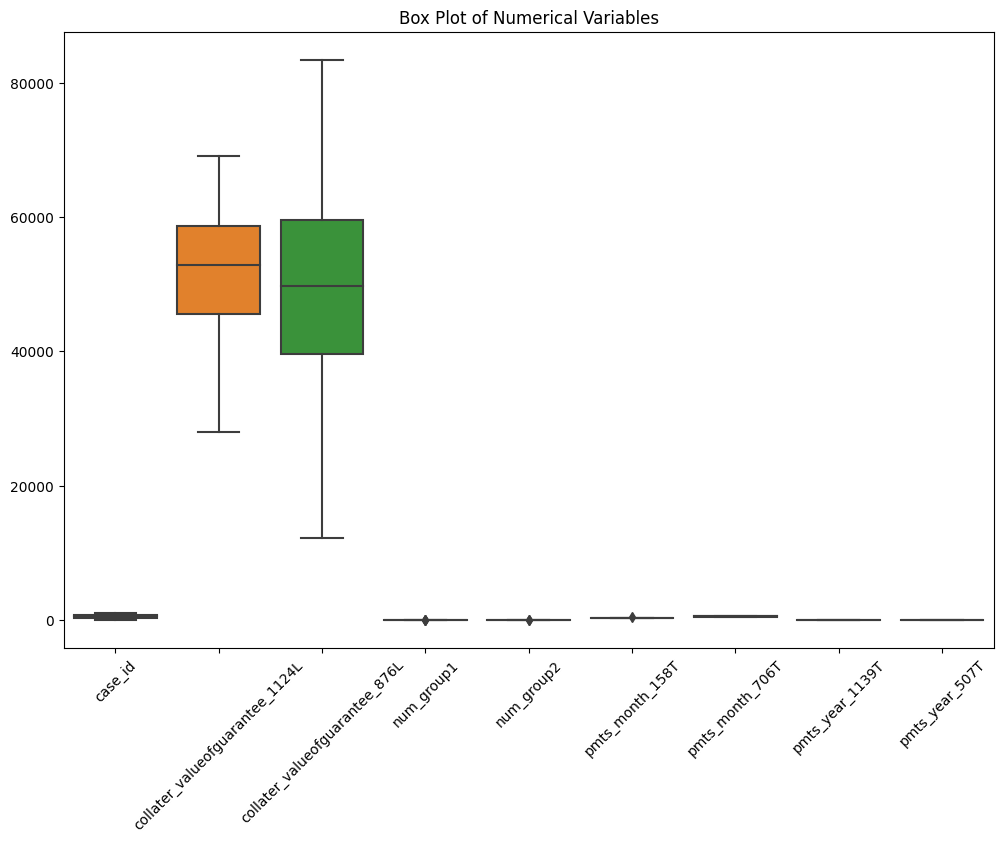

In [27]:
#data visualization using a box plot and violin

data = {
    'case_id': np.random.randint(1, 1000, 100),
    'collater_valueofguarantee_1124L': np.random.normal(50000, 10000, 100),
    'collater_valueofguarantee_876L': np.random.normal(50000, 15000, 100),
    'num_group1': np.random.gamma(shape=2, scale=2, size=100),
    'num_group2': np.random.gamma(shape=2, scale=2, size=100),
    'pmts_month_158T': np.random.poisson(lam=300, size=100),
    'pmts_month_706T': np.random.poisson(lam=500, size=100),
    'pmts_year_1139T': np.random.randint(1, 12, 100),
    'pmts_year_507T': np.random.randint(1, 12, 100)
}
df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Variables')
plt.show()

#plt.figure(figsize=(12, 8))
#sns.violinplot(data=df)
#plt.xticks(rotation=45)
#plt.title('Violin Plot of Numerical Variables')
#plt.show()



Outliers:
Empty DataFrame
Columns: [case_id, collater_valueofguarantee_1124L, collater_valueofguarantee_876L, num_group1, num_group2, pmts_month_158T, pmts_month_706T, pmts_year_1139T, pmts_year_507T]
Index: []


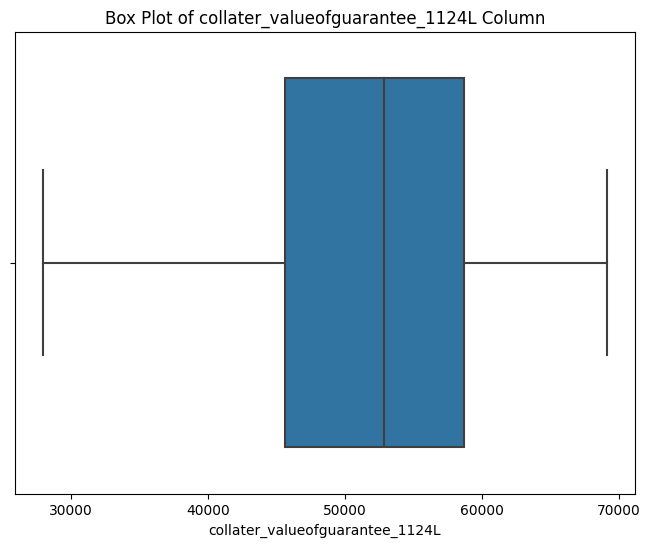

In [28]:
# Calculate the interquartile range (IQR)
Q1 = df['collater_valueofguarantee_1124L'].quantile(0.25)
Q3 = df['collater_valueofguarantee_1124L'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['collater_valueofguarantee_1124L'] < lower_bound) 
              | (df['collater_valueofguarantee_1124L'] > upper_bound)]

# Display outliers
print("Outliers:")
print(outliers)

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='collater_valueofguarantee_1124L', data=df)
plt.title('Box Plot of collater_valueofguarantee_1124L Column')
plt.xlabel('collater_valueofguarantee_1124L')
plt.show()


Summary Statistics of Target Variable:
count      100.000000
mean     51827.808641
std       8603.762950
min      27943.166686
25%      45622.774706
50%      52850.978612
75%      58724.167505
max      69111.360369
Name: collater_valueofguarantee_1124L, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


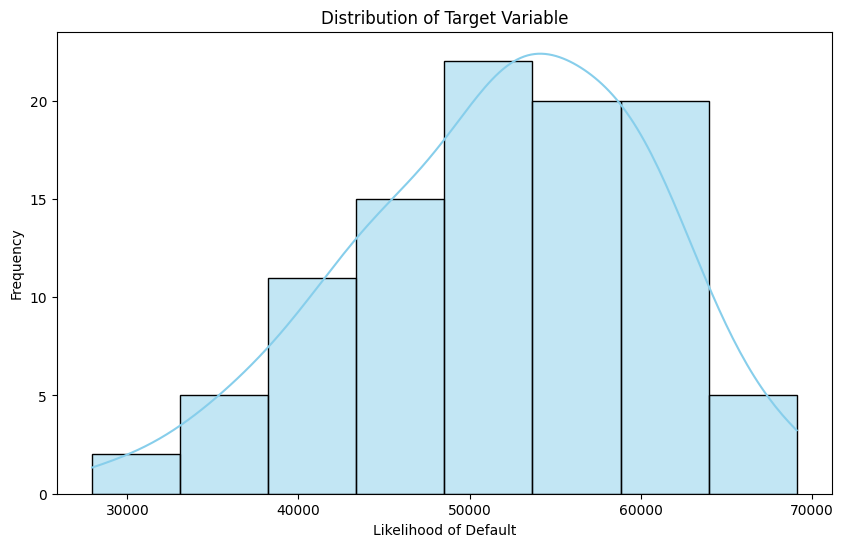

In [29]:
target_variable = df['collater_valueofguarantee_1124L']

# Summary statistics
print("Summary Statistics of Target Variable:")
print(target_variable.describe())

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(target_variable, kde=True, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Likelihood of Default')
plt.ylabel('Frequency')
plt.show()
